In [0]:
!pip install -q tensorflow-gpu==2.1.0

In [1]:
import matplotlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'1.15.2'

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
import os
import numpy as np
import keras
import pandas as pd
import cv2
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten
from google.colab import drive

Using TensorFlow backend.


In [5]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [6]:
!ls /content/gdrive/My\ Drive/dataset/training_set/

animals  art  automobiles  fashion  food  houses  technology  travel


In [7]:
X_train, y_train = [], []
count = 0
for i in os.listdir('/content/gdrive/My Drive/dataset/training_set'):
    true_class = i
    for j in os.listdir('/content/gdrive/My Drive/dataset/training_set/' + i):
        if count%100 == 0:
          print(count)
        img = image.load_img('/content/gdrive/My Drive/dataset/training_set/' + i + '/' + j, target_size = (56, 56))
        img = image.img_to_array(img)
        X_train.append(img)
        y_train.append(i)
        count += 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600


In [9]:
X_test, y_test = [], []
count = 0
for i in os.listdir('/content/gdrive/My Drive/dataset/test_set'):
    true_class = i
    for j in os.listdir('/content/gdrive/My Drive/dataset/test_set/' + i):
        if count%100 == 0:
          print(count)
        img = image.load_img('/content/gdrive/My Drive/dataset/test_set/' + i + '/' + j, 
                                    target_size = (56, 56))
        img = image.img_to_array(img)
        X_test.append(img)
        y_test.append(i)
        count += 1

0
100
200
300
400
500
600
700


In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6696, 56, 56, 3)
(6696,)
(800, 56, 56, 3)
(800,)


In [0]:
X_train = X_train.astype('float32') 
X_test  = X_test.astype('float32')
X_train /= 255
X_test  /= 255

In [0]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
classifier = Sequential()

#1st set of Convolution and Pooling layers
classifier.add(Conv2D(32, (3, 3), padding = "same", input_shape = (56, 56, 3), activation = 'relu'))
classifier.add(BatchNormalization(axis = 1))

classifier.add(Conv2D(32, (3, 3), padding = "same", activation = 'relu'))
classifier.add(BatchNormalization(axis = 1))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

#2nd set of Convolution and Pooling layers
classifier.add(Conv2D(64, (3, 3), padding = "same", activation = 'relu'))
classifier.add(BatchNormalization(axis = 1))

classifier.add(Conv2D(64, (3, 3), padding = "same", activation = 'relu'))
classifier.add(BatchNormalization(axis = 1))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

#Fully Connected Layers
classifier.add(Flatten())
classifier.add(Dense(512, activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

# Softmax classifier
classifier.add(Dense(8, activation = 'softmax'))

classifier.summary()

#Compiling our Basic CNN Model
init_lr = 0.01
batch_size = 16
epochs = 15

classifier.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ["accuracy"])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 56, 56, 32)        896       
_________________________________________________________________
batch_normalization_11 (Batc (None, 56, 56, 32)        224       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 56, 56, 32)        9248      
_________________________________________________________________
batch_normalization_12 (Batc (None, 56, 56, 32)        224       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)       

In [24]:
#Fitting our Basic CNN on the Data
hist = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epochs, batch_size = batch_size)

Train on 6696 samples, validate on 800 samples
Epoch 1/15
6696/6696 [==============================] - 5s 792us/step - loss: 1.0388 - acc: 0.6507 - val_loss: 3.3132 - val_acc: 0.3337
Epoch 2/15
6696/6696 [==============================] - 5s 785us/step - loss: 1.0455 - acc: 0.6374 - val_loss: 1.1630 - val_acc: 0.6338
Epoch 3/15
6696/6696 [==============================] - 5s 767us/step - loss: 0.9240 - acc: 0.6840 - val_loss: 1.2461 - val_acc: 0.6088
Epoch 4/15
6696/6696 [==============================] - 5s 768us/step - loss: 0.8362 - acc: 0.7080 - val_loss: 1.2281 - val_acc: 0.6388
Epoch 5/15
6696/6696 [==============================] - 5s 788us/step - loss: 0.8212 - acc: 0.7173 - val_loss: 1.2820 - val_acc: 0.5900
Epoch 6/15
6696/6696 [==============================] - 5s 779us/step - loss: 0.8886 - acc: 0.6959 - val_loss: 1.1753 - val_acc: 0.6400
Epoch 7/15
6696/6696 [==============================] - 5s 784us/step - loss: 0.7448 - acc: 0.7452 - val_loss: 1.4875 - val_acc: 0.5787
E

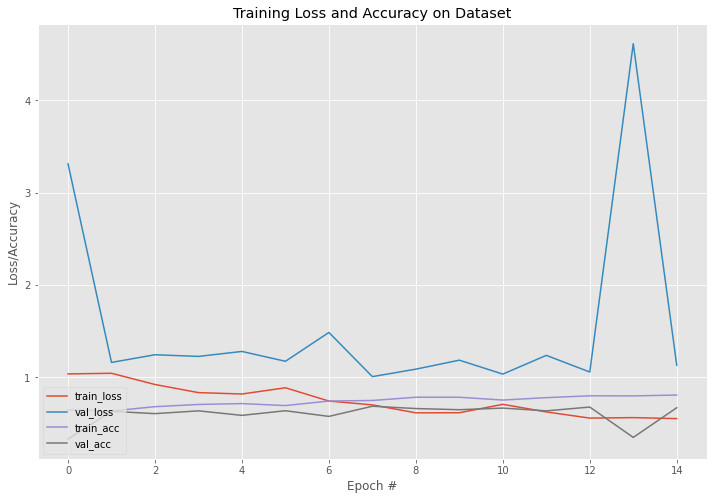

In [26]:
plt.style.use("ggplot")
plt.figure(figsize = (12, 8))
plt.plot(np.arange(0, epochs), hist.history["loss"], label = "train_loss")
plt.plot(np.arange(0, epochs), hist.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, epochs), hist.history["acc"], label = "train_acc")
plt.plot(np.arange(0, epochs), hist.history["val_acc"], label = "val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc = "lower left")
plt.savefig("basic_cnn.png")